In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import seaborn as sns
import shapefile
import warnings
import urllib.request
import zipfile
import random
import itertools
import math
import datetime


warnings.filterwarnings("ignore")

KeyboardInterrupt: 

Readding data

In [2]:
df = pd.read_csv("taxidata_covid_percipitation.csv")

df["time_of_day"] = df["tpep_pickup_datetime"].astype("datetime64[h]").astype("string").str.split(" ", 1, expand=True)[1]
df["tpep_pickup_datetime"] = df["tpep_pickup_datetime"].astype('datetime64[ns]')

df = df.loc[(df["tpep_pickup_datetime"] <  datetime.datetime(2020,7,1)) & (df["tpep_pickup_datetime"] >=  datetime.datetime(2020,1,1))].reset_index(drop = True)
df = df.loc[(df["duration"] >  0)].reset_index(drop = True)
df["time_of_day"] = df["tpep_pickup_datetime"].astype("datetime64[h]").astype("string").str.split(" ", 1, expand=True)[1]

Filtering 

In [3]:
temp = df.loc[(df["tpep_pickup_datetime"] <  datetime.datetime(2020,2,1)) & (df["tpep_pickup_datetime"] >=  datetime.datetime(2020,1,1))].sample(1000000, random_state=1000)
temp = temp.append(df.loc[(df["tpep_pickup_datetime"] <  datetime.datetime(2020,3,1)) & (df["tpep_pickup_datetime"] >=  datetime.datetime(2020,2,1))].sample(1000000, random_state=1000))
temp = temp.append(df.loc[(df["tpep_pickup_datetime"] <  datetime.datetime(2020,4,1)) & (df["tpep_pickup_datetime"] >=  datetime.datetime(2020,3,1))].sample(1000000, random_state=1000))
temp = temp.append(df.loc[(df["tpep_pickup_datetime"] <  datetime.datetime(2020,7,1)) & (df["tpep_pickup_datetime"] >=  datetime.datetime(2020,4,1))])
temp

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,duration,tip_per_minute,tpep_pickup_datetime_D,Date,Percipitation (in),date,cases,deaths,daily change,time_of_day
2317196,3169910,2.0,2020-01-17 00:18:16,2020-01-17 00:22:24,1.0,0.79,1.0,N,79,125,...,4.133333,0.241935,2020-01-17 00:00:00,2020-01-17 00:00:00,0.01,2020-01-17 00:00:00,0.0,0.0,0.0,00:00:00
4095009,5560260,2.0,2020-01-28 17:14:52,2020-01-28 17:36:09,1.0,3.09,1.0,N,170,143,...,21.283333,0.181363,2020-01-28 00:00:00,2020-01-28 00:00:00,0.00,2020-01-28 00:00:00,0.0,0.0,0.0,17:00:00
3634343,4940127,1.0,2020-01-25 14:06:33,2020-01-25 14:19:57,1.0,2.10,1.0,N,237,230,...,13.400000,0.246269,2020-01-25 00:00:00,2020-01-25 00:00:00,0.00,2020-01-25 00:00:00,0.0,0.0,0.0,14:00:00
2208788,3030506,1.0,2020-01-16 14:34:30,2020-01-16 14:45:31,1.0,1.20,1.0,N,107,170,...,11.016667,0.090772,2020-01-16 00:00:00,2020-01-16 00:00:00,0.04,2020-01-16 00:00:00,0.0,0.0,0.0,14:00:00
1383643,1931812,1.0,2020-01-11 08:28:52,2020-01-11 08:59:01,1.0,18.00,2.0,N,132,163,...,30.150000,0.406302,2020-01-11 00:00:00,2020-01-11 00:00:00,0.00,2020-01-11 00:00:00,0.0,0.0,0.0,08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12238636,16785300,1.0,2020-06-30 23:05:31,2020-06-30 23:09:10,1.0,0.80,1.0,N,161,233,...,3.650000,0.479452,2020-06-30 00:00:00,2020-06-30 00:00:00,0.00,2020-06-30 00:00:00,398142.0,31776.0,458.0,23:00:00
12238637,16785301,1.0,2020-06-30 23:27:28,2020-06-30 23:39:29,1.0,2.50,1.0,N,186,148,...,12.016667,0.083218,2020-06-30 00:00:00,2020-06-30 00:00:00,0.00,2020-06-30 00:00:00,398142.0,31776.0,458.0,23:00:00
12238638,16785302,2.0,2020-06-30 23:39:17,2020-06-30 23:59:13,4.0,17.98,2.0,N,132,75,...,19.933333,0.738963,2020-06-30 00:00:00,2020-06-30 00:00:00,0.00,2020-06-30 00:00:00,398142.0,31776.0,458.0,23:00:00
12238639,16785304,2.0,2020-06-30 23:24:49,2020-06-30 23:32:00,1.0,1.52,1.0,N,138,70,...,7.183333,0.245012,2020-06-30 00:00:00,2020-06-30 00:00:00,0.00,2020-06-30 00:00:00,398142.0,31776.0,458.0,23:00:00


In [4]:
temp_df = temp[["time_of_day", "PULocationID" , "trip_distance", "passenger_count", "duration", "fare_amount", "Percipitation (in)", "daily change","tip_amount", "tip_per_minute"  ]]

- linear model or naive bayes model on 6 or more variables
- knn on location only

In [5]:
temp_df = temp_df.dropna()
temp_df = temp_df.loc[temp_df["fare_amount"] >= 0]
temp_df = temp_df.loc[temp_df["tip_amount"] >= 0]

In [ ]:
temp_df
temp_df.to_csv("data_to_r.csv")

In [6]:
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


,tip_amount,fare_amount,passenger_count,duration,trip_distance,daily change,Percipitation (in)
tip_amount,1.000000,0.703059,0.008791,0.093834,0.667577,-0.024169,-0.002239
fare_amount,0.703059,1.000000,0.003900,0.141109,0.865483,-0.018652,-0.001966
passenger_count,0.008791,0.003900,1.000000,0.015991,0.008929,-0.027695,-0.002604
duration,0.093834,0.141109,0.015991,1.000000,0.143123,-0.013134,0.000174
trip_distance,0.667577,0.865483,0.008929,0.143123,1.000000,-0.003605,-0.003345
daily change,-0.024169,-0.018652,-0.027695,-0.013134,-0.003605,1.000000,0.051336
Percipitation (in),-0.002239,-0.001966,-0.002604,0.000174,-0.003345,0.051336,1.000000


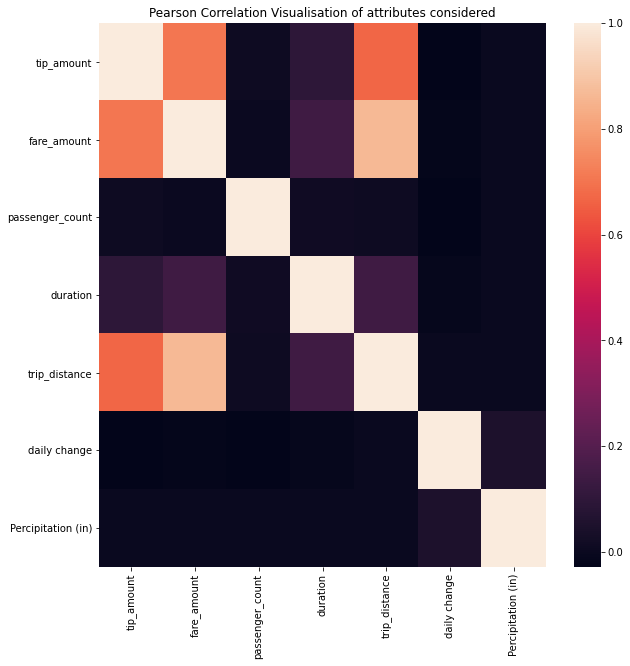

In [8]:
y = df['tip_amount']
X = df[["fare_amount","passenger_count","duration","trip_distance","daily change"]]
fig , ax = plt.subplots(figsize = (10,10))
sns.heatmap(df[["tip_amount","fare_amount","passenger_count","duration","trip_distance","daily change", "Percipitation (in)"]].corr())
ax.set(title = "Pearson Correlation Visualisation of attributes considered")
df[["tip_amount","fare_amount","passenger_count","duration","trip_distance","daily change", "Percipitation (in)"]].corr()

In [ ]:
plt.boxplot(df.loc[df["fare_amount"]])

Fitting Decision Tree Regressor and Random Forest

In [ ]:
y = df['tip_amount']
X = df[["fare_amount","passenger_count","duration","trip_distance","daily change"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = tree.DecisionTreeRegressor(max_depth=2)
reg.fit(X_train, y_train)

In [ ]:
pred_train_tree= reg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

# Code lines 4 to 6
pred_test_tree= reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))



In [ ]:
print("=====================================TRAIN=====================================")
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,pred_train_tree))))
print("R Square: {}".format(r2_score(y_train, pred_train_tree)))
print("=====================================TEST=====================================")
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pred_test_tree))))
print("R Square: {}".format(r2_score(y_test, pred_test_tree)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)

pred_test_rf = model_rf.predict(X_test)


In [ ]:
print("=====================================TRAIN=====================================")
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,pred_train_rf))))
print("R Square: {}".format(r2_score(y_train, pred_train_rf)))

print("=====================================TEST=====================================")
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pred_test_rf))))
print("R Square: {}".format(r2_score(y_test, pred_test_rf)))

In [ ]:
import graphviz 

tree.export_graphviz(reg, out_file='pruned.dot', feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)

with open("pruned.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)